In [1]:
using DrWatson
quickactivate(@__DIR__)

using StatsBase
using Plots
using DataFrames
using CSV

In [3]:
prev_res = DrWatson.collect_results(
        datadir("karate-sims"),
        rinclude=[r"NumKarv[.]*"]
        #   black_list = bl,
    )
first(destab_res, 10)

┌ Info: Scanning folder /home/pgorski/Desktop/programming/curheider/PolarizationFramework/data/karate-sims for result files.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:115
┌ Info: Added 450 entries.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:191


,ode_fun_name,LP,LP_std,zmax,pos_links_changed_std,BR_std,GP
,String?,Float64?,Float64?,Int64?,Float64?,Float64?,Float64?
1,Heider9!,0.728889,0.114972,100,3.94931,0.000196635,1.0
2,Heider9!,0.758,0.109592,100,3.54963,0.000433337,1.0
3,Heider9!,0.737778,0.137894,100,4.18854,0.000461307,1.0
4,Heider9!,0.722667,0.139458,100,3.0965,0.0241971,0.86
5,Heider9!,0.712222,0.118324,100,3.37495,0.0668408,0.32
6,Heider9!,0.570444,0.112119,100,3.28724,0.116288,0.0
7,Heider9!,0.745111,0.132299,100,3.13048,0.00976233,0.92
8,Heider9!,0.730222,0.109552,100,3.62621,0.0492458,0.56
9,Heider9!,0.582667,0.126364,100,3.4555,0.0852825,0.0


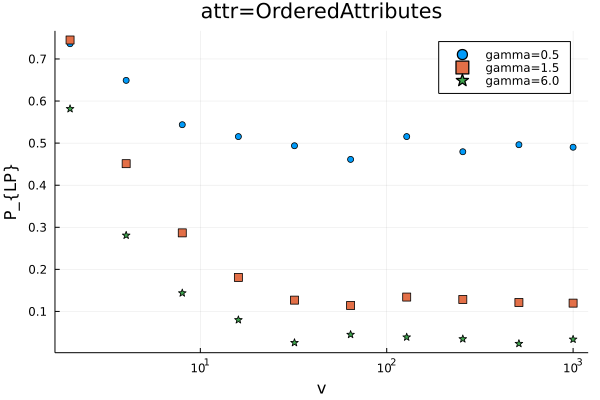

In [13]:
# N = 9
attr_name = "OrderedAttributes" # ["OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
G = unique(prev_res.G)
G = [5]
gamma = unique(prev_res.gamma)

params = @strdict attr_name G gamma 
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(prev_res)[1])

    for param in dict
        inds .*= prev_res[!, string(param[1])] .== param[2]
    end

    plot!(p, prev_res.attr_degeneracy[inds], prev_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "v", ylabel = "P_{LP}", legend = :best, xaxis=:log)
attr = attr_name
# v = attr_degeneracy
title!(savename(@ntuple(attr, G)))

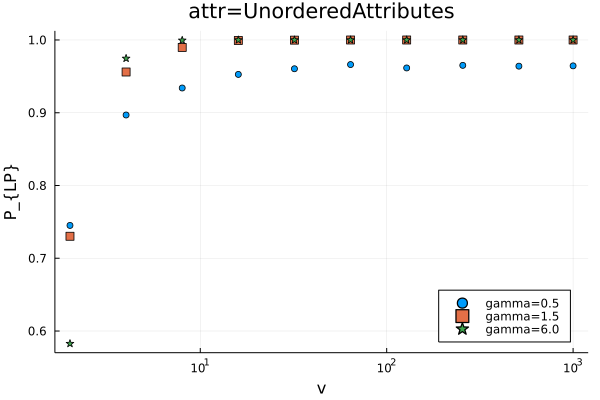

In [16]:
# N = 9
attr_name = "UnorderedAttributes" # ["OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
G = unique(prev_res.G)
G = [5]
gamma = unique(prev_res.gamma)

params = @strdict attr_name G gamma 
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(prev_res)[1])

    for param in dict
        inds .*= prev_res[!, string(param[1])] .== param[2]
    end

    plot!(p, prev_res.attr_degeneracy[inds], prev_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "v", ylabel = "P_{LP}", legend = :bottomright, xaxis=:log)
attr = attr_name
# v = attr_degeneracy
title!(savename(@ntuple(attr, G)))

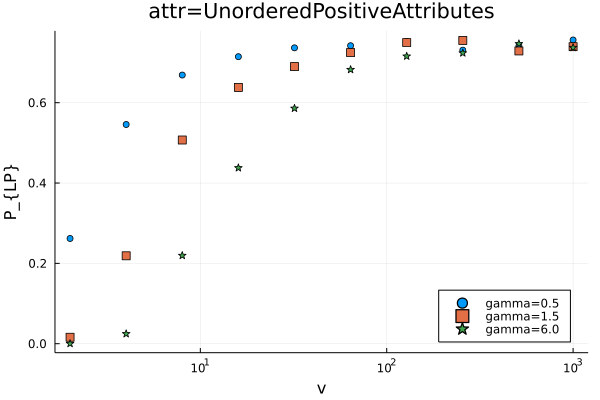

In [17]:
# N = 9
attr_name = "UnorderedPositiveAttributes" # ["OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
G = unique(prev_res.G)
G = [5]
gamma = unique(prev_res.gamma)

params = @strdict attr_name G gamma 
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(prev_res)[1])

    for param in dict
        inds .*= prev_res[!, string(param[1])] .== param[2]
    end

    plot!(p, prev_res.attr_degeneracy[inds], prev_res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["gamma"]))
end

plot(p, xlabel = "v", ylabel = "P_{LP}", legend = :bottomright, xaxis=:log)
attr = attr_name
# v = attr_degeneracy
title!(savename(@ntuple(attr, G)))